### 导入库
顺便定义些常量

In [1]:
from helper import *

Using TensorFlow backend.


### 随机打乱数组里图片的顺序
均匀分布会过拟合

In [2]:
for i in tqdm(range(100)):
    images_path, y = shuffle(images_path, y)

100%|██████████| 100/100 [00:00<00:00, 371.91it/s]


### 读取图片数据到内存

In [3]:
#remove invalid data
for i in tqdm(range(n)):
    data = cv2.imread(images_path[i])
    shape = data.shape[:2]
    shapes[i] = shape
    X[i] = cv2.resize(data, (width, width))

100%|██████████| 25000/25000 [01:01<00:00, 407.35it/s]


### 检查一下数据
随机显示12张图片观察图片的特征

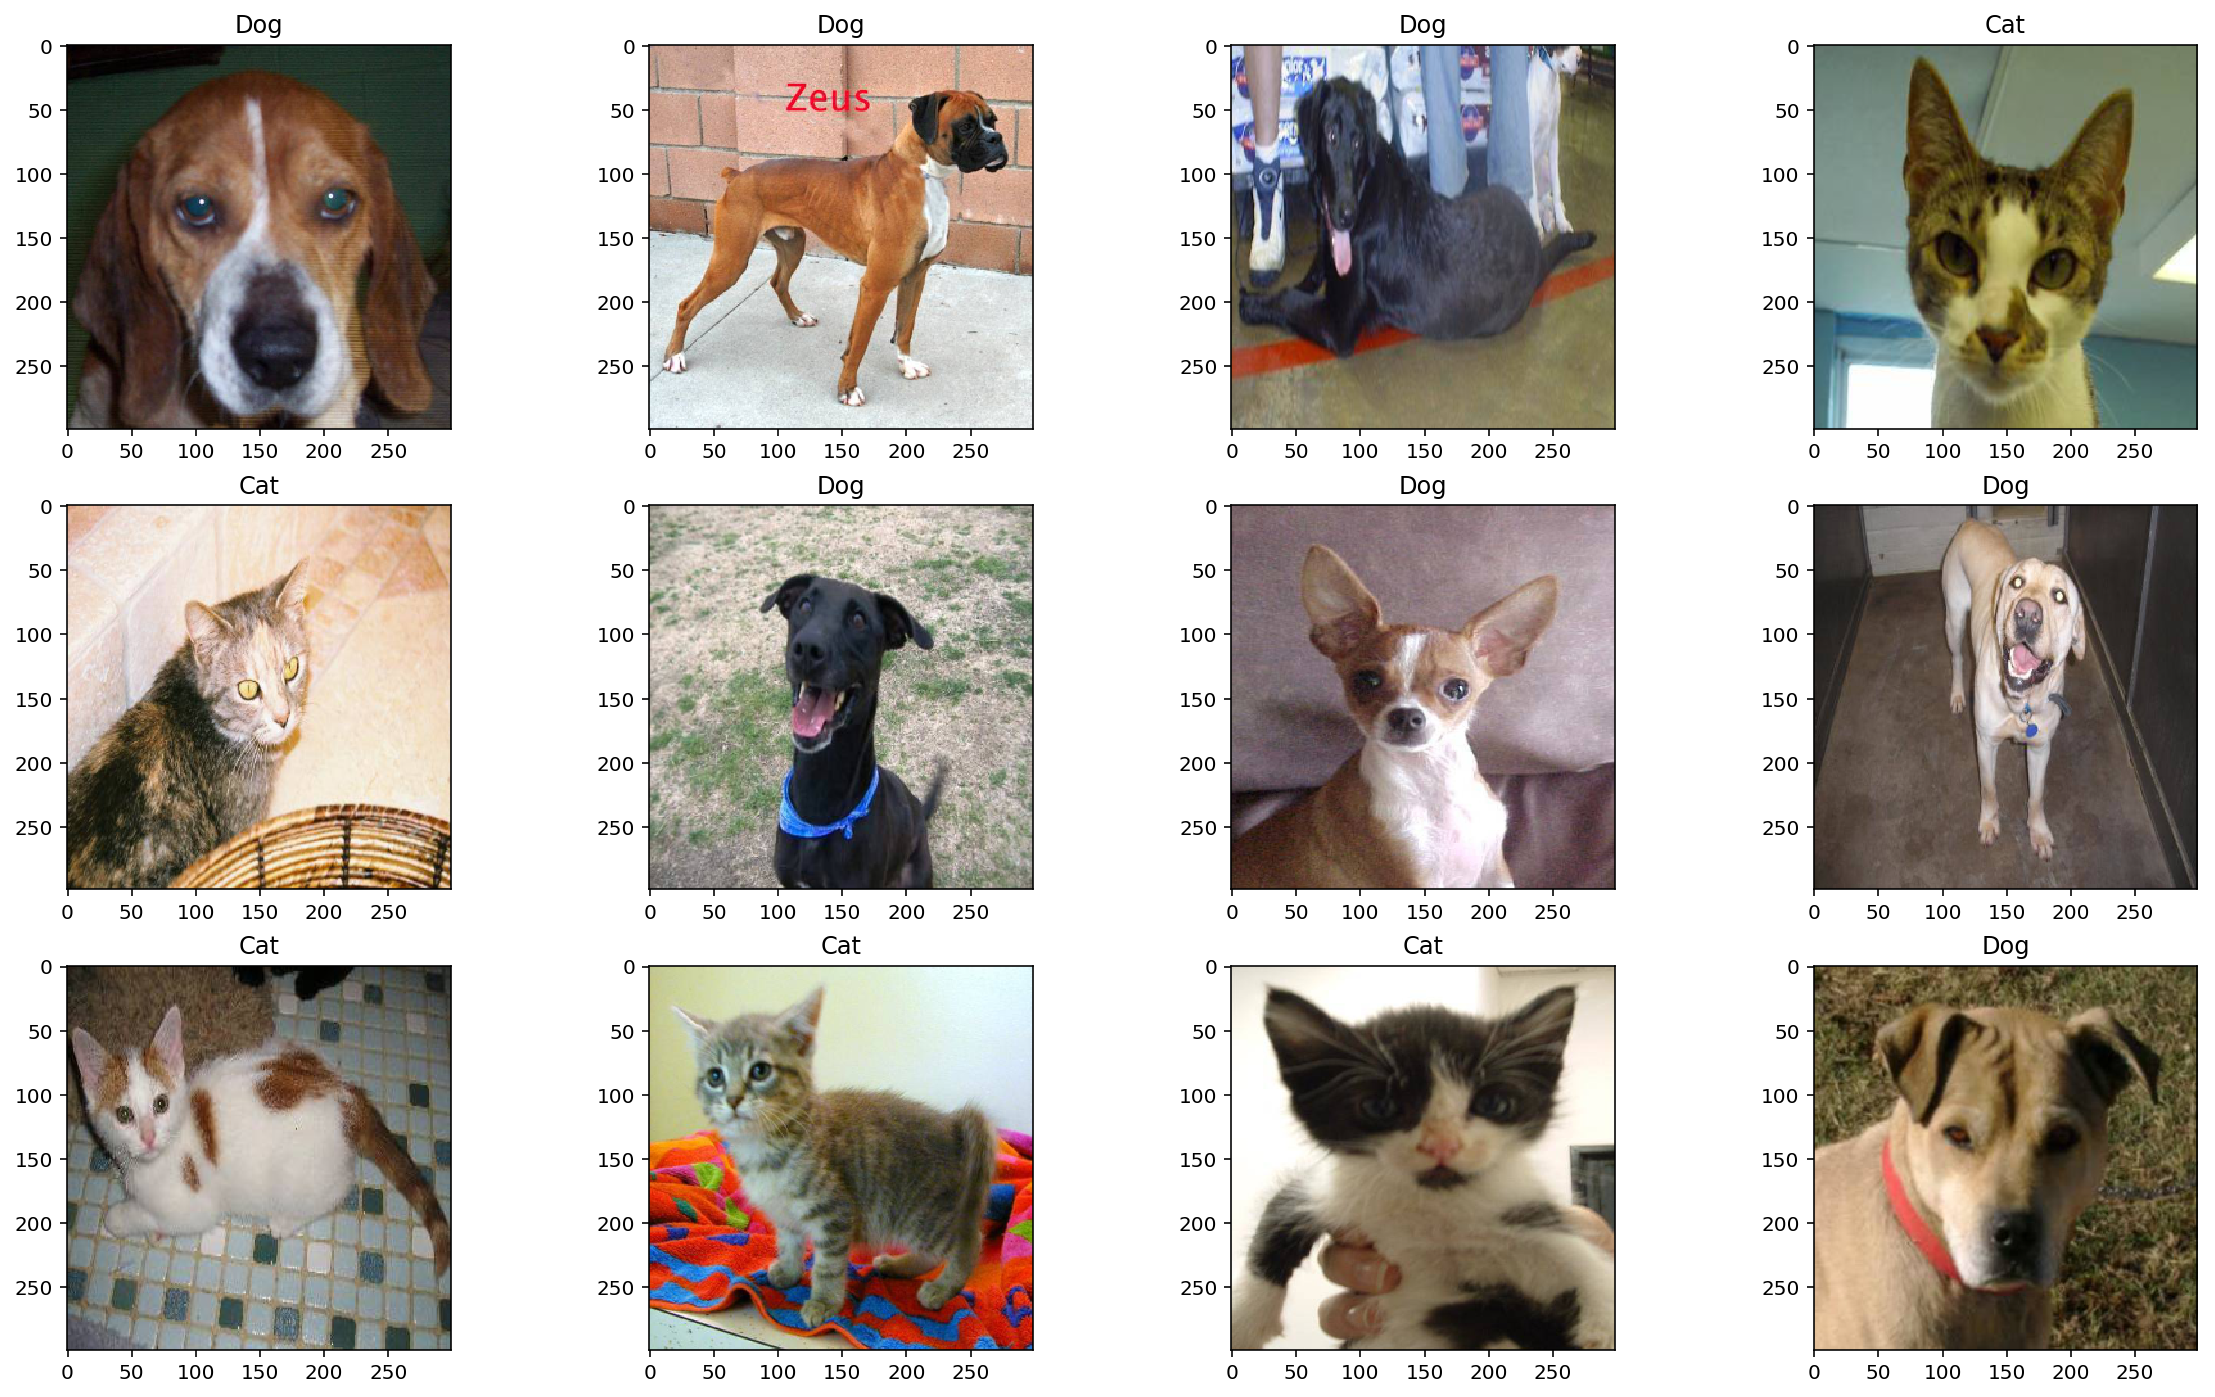

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(20, 12))
for i in range(12):
    random_index = random.randint(0, n - 1)
    plt.subplot(3, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])
    plt.title('Dog' if y[random_index] > 0.5 else 'Cat')

### 检查一下数据
查看猫狗在这份数据中的分布

Text(0.5,1,'Cats and Dogs')

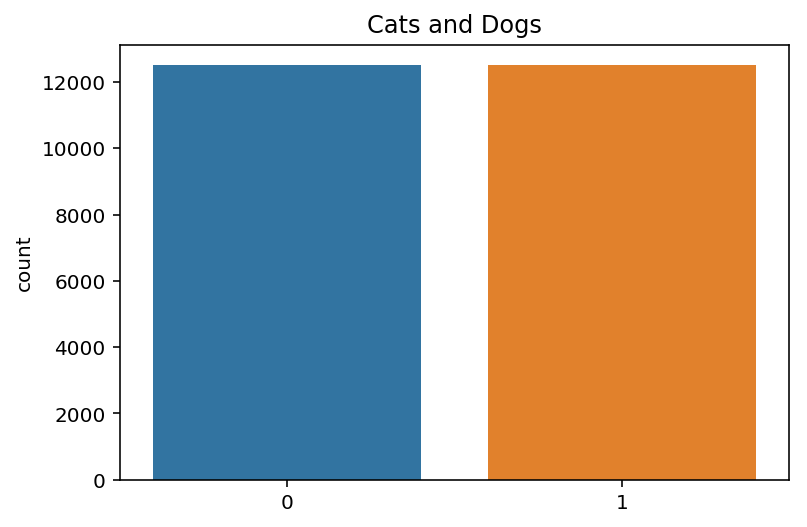

In [5]:
sns.countplot(y.reshape(n))
plt.title('Cats and Dogs')

### 检查一下数据
查看width and height在这份数据中的分布

[784, 5626, 13678, 4910, 1, 1] ['< 153', '< 306', '< 459', '< 612', '< 765', '< 918'] 32 768
[1867, 9672, 13459, 0, 1, 1] ['< 210', '< 420', '< 630', '< 840', '< 1050', '< 1260'] 42 1050


Text(0.5,1,'32 < value < 768')

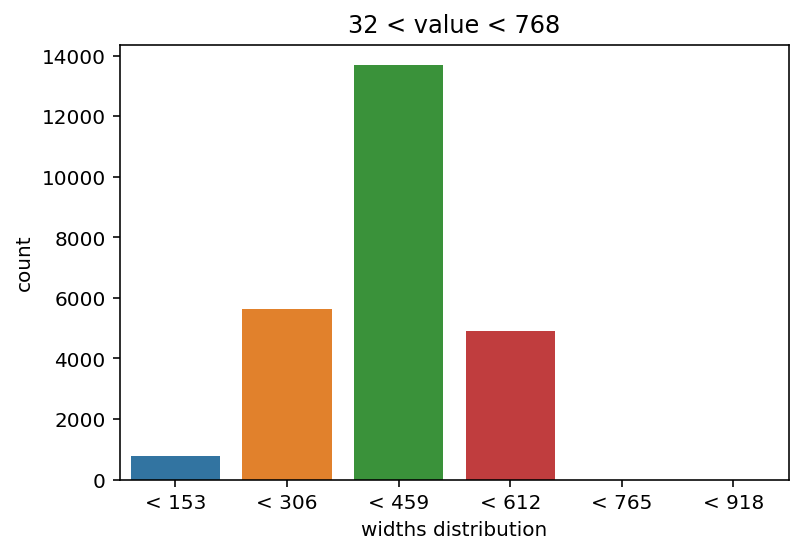

In [6]:
widths = shapes[:,[0]]
heights = shapes[:,[1]]

width_distribute, width_names, width_min, width_max = getDistribution(widths)
height_distribute, height_names, height_min, height_max = getDistribution(heights)

data_widths = {"widths distribution":width_names, "count":width_distribute}
data_heights = {"heights distribution":height_names, "count":height_distribute}
sns.barplot(x='widths distribution', y='count',data=DataFrame(data_widths))
plt.title('' + str(width_min) + ' < value < ' + str(width_max))

Text(0.5,1,'42 < value < 1050')

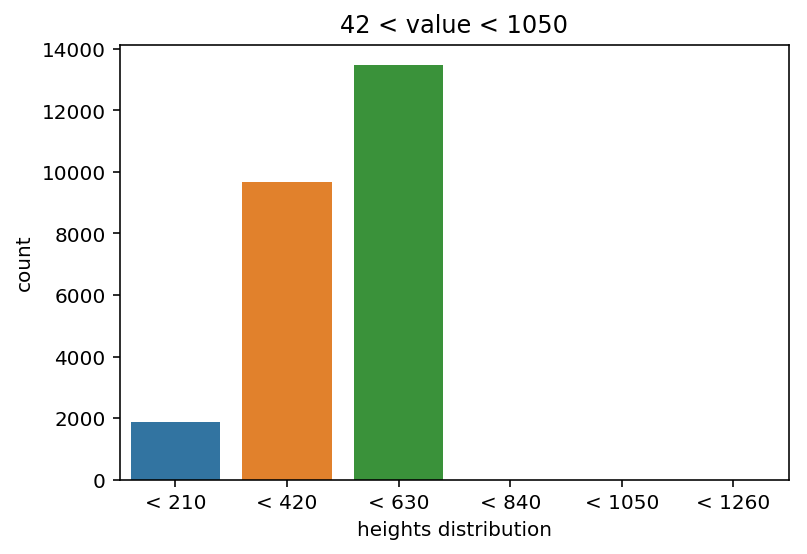

In [7]:
sns.barplot(x='heights distribution', y='count',data=DataFrame(data_heights))
plt.title('' + str(height_min) + ' < value < ' + str(height_max))